#  <center> <span style="color:blue"> Compte Rendu TP N°1   <center> </span> <center> <center><span style="color:blue">Perceptron mono-couche</span></center>

### <center>Réaliser par : Jihen Fennani et Chaima Znaidi </center>

# Objectif:
Le but de ce travail pratique est de familiariser les étudiants avec les principes fondamentaux des réseaux de neurones à travers l'étude du perceptron, une forme simple de réseau de neurones mono-couche. Durant ce TP , nous allons explorer et analyser l'algorithme du perceptron, un modèle de base largement utilisé pour des tâches de classification binaire.<br>
Cette exploration vise à comprendre comment de tels modèles apprennent à partir des données et comment ils peuvent être utilisés pour résoudre des problèmes de classification.

## I. Travail à faire

### 1.Algorithme :
**Complexité de perception en temps** <br>
La complexité en temps pour l'entraînement d'un perceptron dépend principalement du
nombre d'itérations nécessaires pour converger, du nombre de caractéristiques (features)
dans les données d'entraînement et de la taille des données.<br>
Ainsi, la complexité en temps du perceptron s'écrit : **O(n)*O(p)*t**, elle est donc de   n \* p \* t   avec 
- t est le nombre d'itération(epochs)
- n est la taille des données (nombre d'instances)
- p est le nombre des features

**Complexité de perception en espace** <br>
La complexité en espace pour l'entraînement d'un perceptron dépend principalement du
nombre d'itérations nécessaires pour converger, du nombre de caractéristiques (features) et
de la taille des données.<br>
Ainsi, la complexité en temps du perceptron s'écrit : **O(n)*O(p)**, elle est donc de l’ordre de
n*p avec
- n est la taille des données (nombre d'instances)
- p est le nombre des features 

### 2. Dataset :

In [1]:
! pip install matplotlib numpy

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

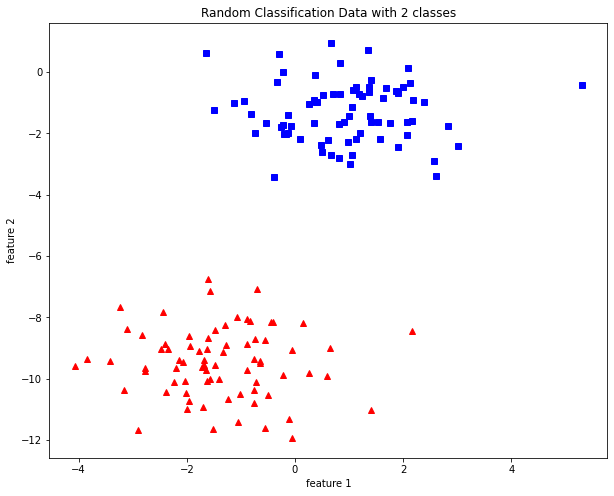

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
X, y = datasets.make_blobs (n_samples=150, n_features=2,
centers=2, cluster_std=1.05,

random_state=2)

#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

### 3. Implémentation :

1. Coder la fonction d’activation de Heaviside :

In [3]:
def acti_func(z):
    if z > 0:
        return 1
    else:
        return 0


2. Implementer l’algorithme de perceptron

In [36]:
def perceptron(X, y, lr, epochs):
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate. vitesse d'app 
    # epochs --> Number of iterations. y3awed yerani les instance 
    # m -> number of training examples npmbre d'instances 
    # n -> number of features =2 
    m, n = X.shape
    
    # Initializing parameters(theta) to zeros.
    # +1 in n+1 for the bias term.
    w = np.zeros((n+1,1))
    
    # Empty list to store how many examples were
    # misclassified at every iteration. le nb d'instance incorrectement classifier 
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        # Variable to store #misclassified.
        n_miss = 0
        # Looping for every example. 
        # idx = indice d'instance Xi = instance de taille =2  
        for idx, x_i in enumerate(X):
            # Inserting 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1) # ajout de 1 à indice 0 wallet (1,X1,X2) pour le bais 
            # Calculating prediction/hypothesis.
            y_hat = acti_func(np.dot(x_i.T, w))
            # Check if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:  
                # squeezetaille 3*1 = 3 : conformeter y_hat y_index 
                # Update the weights.
                w += lr * (y[idx] - np.squeeze(y_hat)) * x_i 
              
                # Incrementing by 1.
                n_miss += 1
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
    
    return w, n_miss_list

3. Tracez la limite de décision trouvée par votre algorithme.

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(X, w):
    # X --> Inputs
    # w --> parameters (w[0] is the bias term)
    
    # The Line is y = mx + c
    # So, Equate mx + c = w0 + w1*X1 + w2*X2
    # Solving for m and c:
    x1 = np.array([min(X[:, 0]), max(X[:, 0])])
    # The weights are w[1] for X1 and w[2] for X2, and the bias is w[0].
    m = -w[1] / w[2]
    c = -w[0] / w[2]
    x2 = m * x1 + c # equation de droite de barriére de décision 
    
    # Plotting
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
    plt.plot(x1, x2, label='Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.show()


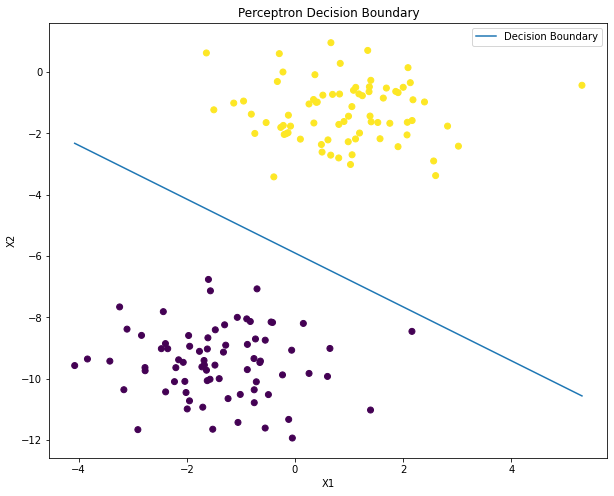

les poids : [[0.1       ]
 [0.01488595]
 [0.01693843]]
nombre miss classify :  [14, 0, 0, 0, 0]


In [18]:
# Entraîner le perceptron
lr = 0.01
epochs = 5 # augmenter epochs ==> augmenter la complexité temporelle 
w, n_miss_list = perceptron(X, y, lr, epochs)

# Tracer la limite de décision
plot_decision_boundary(X, w)
print ('les poids :',w)
print ('nombre miss classify : ', n_miss_list)

- Les poids sont [0.1, 0.01488959, 0.01693843]: 
Le premier poids 0.1 est le
terme de biais (w[0]), et les deux autres sont les poids associés aux deux caractéristiques des données (w[1] et w[2]).
-  La liste [14, 0, 0, 0, 0] montre le nombre d'exemples mal classifiés après chaque époque d'entraînement.<br>
On peut observer qu'après la première époque, **14** points étaient **mal classifiés**. <br>
Cependant, dans les époques suivantes, il n'y a eu aucun exemple mal classifié, ce qui signifie que le perceptron a rapidement appris à séparer les deux classes correctement.

- Le bon fonctionnement de l'algo de perctrone depend de distribution des calsse 

## II. Exercice2

## 2. Implémentation :

###  Expérience 1 : σ1² = σ2² = 0.25

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# Paramètres des distributions gaussiennes
mu1, sigma1 = np.array([-1, 0]), 0.25
mu2, sigma2 = np.array([1, 0]), 0.25

# Générer les points de données
x1 = np.random.normal(mu1, sigma1, (125, 2))
x2 = np.random.normal(mu2, sigma2, (125, 2))

# Créer les étiquettes
y1 = np.ones(125)  # Classe 1
y2 = np.zeros(125)  # Classe 0

# Fusionner et mélanger les données
X = np.vstack((x1, x2))
y = np.concatenate((y1, y2))
X, y = shuffle(X, y, random_state=42)

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérifier les tailles des ensembles pour confirmer la division
print(f"Taille de l'ensemble d'entraînement : {X_train.shape[0]}")
print(f"Taille de l'ensemble de test : {X_test.shape[0]}")


Taille de l'ensemble d'entraînement : 200
Taille de l'ensemble de test : 50


#### a. Implémenter l’algorithme de perceptron

In [18]:
# Paramètres d'entraînement du perceptron
learning_rate = 0.01
epochs = 1000

# Entraînement du perceptron
weights, errors = perceptron(X_train, y_train, learning_rate, epochs)


#### b. Tracez la limite de décision

Visualisation de la frontière de décision sur l'ensemble d'entraînement


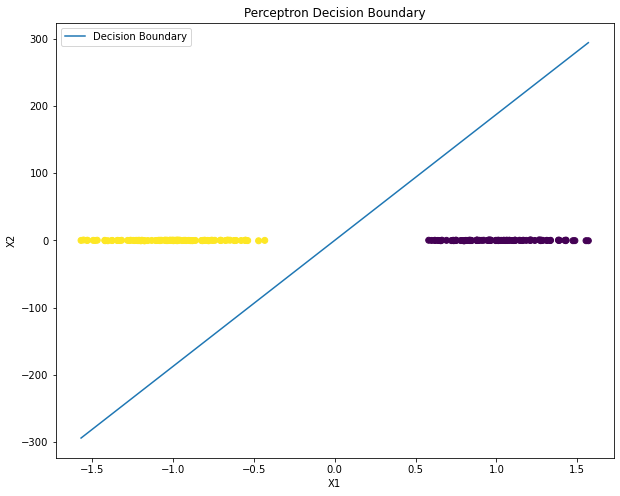

les poids : [[ 0.00000000e+00 -1.66128334e-02  8.85776079e-05]]
nombre miss classify :  [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
# Visualisation de la frontière de décision sur l'ensemble d'entraînement
print("Visualisation de la frontière de décision sur l'ensemble d'entraînement")
plot_decision_boundary(X_train, y_train, weights)
print ('les poids :',weights.T)
print ('nombre miss classify : ', errors)

#### c. Calculer la justesse (accuracy) de la classification sur l'ensemble de test.

In [22]:
# Fonction pour calculer l'accuracy
def calculate_accuracy(X, y, w):
    correct_predictions = 0
    for idx, x_i in enumerate(X):
        x_i = np.insert(x_i, 0, 1).reshape(-1,1)
        prediction = acti_func(np.dot(x_i.T, w))
        if prediction == y[idx]:
            correct_predictions += 1
    return correct_predictions / len(X)

In [23]:
# Calcul de l'accuracy sur l'ensemble de test
accuracy_test = calculate_accuracy(X_test, y_test, weights)
print(f"Accuracy sur l'ensemble de test : {accuracy_test}")

Accuracy sur l'ensemble de test : 1.0


 Visualisation de la frontière de décision sur l'ensemble de test


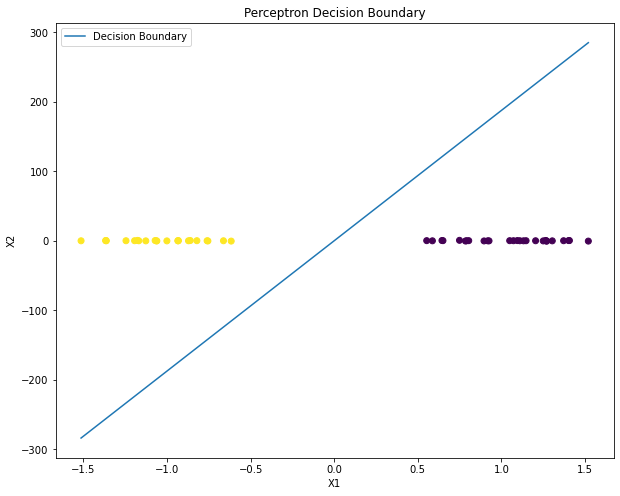

In [21]:
# Visualisation de la frontière de décision sur l'ensemble de test
print(" Visualisation de la frontière de décision sur l'ensemble de test")
plot_decision_boundary(X_test, y_test, weights)

**Conclusion de l’expérience 1** :
L’algorithme du Perceptron converge puisqu’il a trouvé » une
pondération des caractéristiques qui sépare parfaitement les deux classes, comme en
témoigne l'accuracy de 100% sur l'ensemble de test et la visualisation claire de la frontière
de décision sans chevauchement entre les classes.

###  Expérience 2 : σ1² = σ2² = 0.75

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# Paramètres des distributions gaussiennes
mu1, sigma1 = np.array([-1, 0]), 0.75
mu2, sigma2 = np.array([1, 0]), 0.75

# Générer les points de données
x1 = np.random.normal(mu1, sigma1, (125, 2))
x2 = np.random.normal(mu2, sigma2, (125, 2))

# Créer les étiquettes
y1 = np.ones(125)  # Classe 1
y2 = np.zeros(125)  # Classe 0

# Fusionner et mélanger les données
X = np.vstack((x1, x2))
y = np.concatenate((y1, y2))
X, y = shuffle(X, y, random_state=42)

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérifier les tailles des ensembles pour confirmer la division
print(f"Taille de l'ensemble d'entraînement : {X_train.shape[0]}")
print(f"Taille de l'ensemble de test : {X_test.shape[0]}")


Taille de l'ensemble d'entraînement : 200
Taille de l'ensemble de test : 50


#### d. Implémenter l’algorithme de perceptron

In [26]:
# Paramètres d'entraînement du perceptron
learning_rate = 0.01
epochs = 1000

# Entraînement du perceptron
weights, errors = perceptron(X_train, y_train, learning_rate, epochs)

#### e. Tracez la limite de décision

Visualisation de la frontière de décision sur l'ensemble d'entraînement


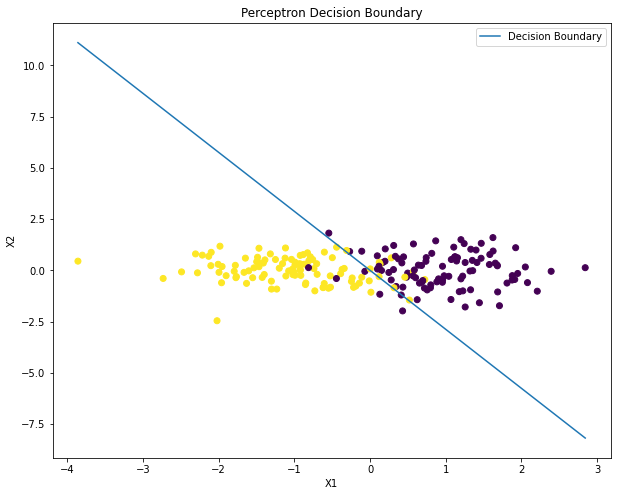

les poids : [[ 0.         -0.01736715 -0.00603833]]
nombre miss classify :  [31, 27, 24, 26, 22, 24, 26, 26, 28, 24, 26, 26, 26, 26, 28, 26, 26, 28, 24, 26, 26, 26, 26, 26, 26, 26, 24, 26, 26, 26, 26, 26, 26, 28, 26, 26, 24, 26, 26, 26, 26, 26, 26, 28, 26, 28, 24, 26, 26, 26, 26, 26, 24, 26, 26, 26, 28, 24, 26, 26, 22, 24, 26, 26, 28, 24, 26, 26, 26, 28, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 28, 26, 26, 28, 24, 26, 26, 26, 26, 26, 26, 26, 26, 26, 28, 24, 26, 26, 28, 24, 26, 26, 26, 26, 26, 26, 24, 26, 26, 26, 26, 26, 26, 25, 27, 28, 26, 28, 24, 26, 26, 26, 26, 26, 24, 26, 22, 24, 26, 26, 24, 26, 28, 24, 26, 26, 26, 26, 26, 24, 26, 26, 26, 26, 22, 24, 26, 22, 24, 26, 26, 24, 26, 28, 24, 26, 26, 26, 26, 26, 24, 26, 26, 26, 26, 22, 24, 26, 22, 24, 26, 26, 24, 26, 28, 24, 26, 26, 26, 26, 26, 26, 24, 26, 26, 26, 26, 26, 26, 25, 27, 28, 26, 28, 24, 26, 26, 26, 26, 26, 24, 26, 22, 24, 26, 26, 24, 26, 28, 24, 26, 26, 26, 26, 26, 24, 26, 26, 26, 26, 22, 24, 26, 22, 24, 26, 26, 24, 26,

In [27]:
# Visualisation de la frontière de décision sur l'ensemble d'entraînement
print("Visualisation de la frontière de décision sur l'ensemble d'entraînement")
plot_decision_boundary(X_train, y_train, weights)
print ('les poids :',weights.T)
print ('nombre miss classify : ', errors)

#### f. Calculer la justesse (accuracy) de la classification sur l'ensemble de test.

- on a utilisée deux méthodes de calcule de accuracy

In [28]:
from sklearn.metrics import accuracy_score

# Prédictions sur l'ensemble de test
y_pred = [acti_func(np.dot(np.insert(x_i, 0, 1).reshape(-1,1).T, weights)) for x_i in X_test]

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.86


Visualisation de la frontière de décision sur l'ensemble d'entraînement


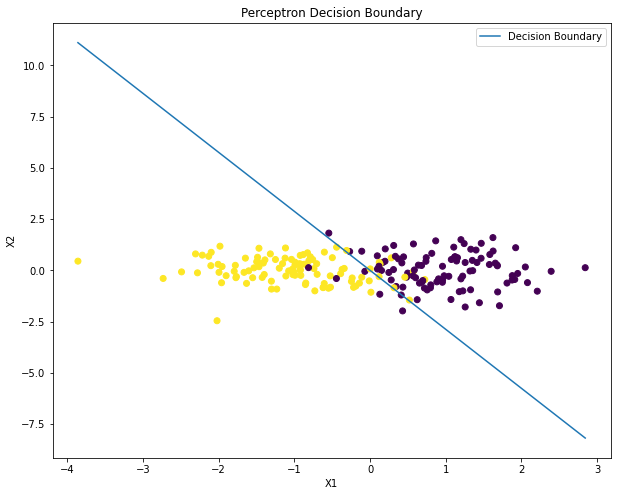

les poids : [[ 0.         -0.01736715 -0.00603833]]
nombre miss classify :  [31, 27, 24, 26, 22, 24, 26, 26, 28, 24, 26, 26, 26, 26, 28, 26, 26, 28, 24, 26, 26, 26, 26, 26, 26, 26, 24, 26, 26, 26, 26, 26, 26, 28, 26, 26, 24, 26, 26, 26, 26, 26, 26, 28, 26, 28, 24, 26, 26, 26, 26, 26, 24, 26, 26, 26, 28, 24, 26, 26, 22, 24, 26, 26, 28, 24, 26, 26, 26, 28, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 28, 26, 26, 28, 24, 26, 26, 26, 26, 26, 26, 26, 26, 26, 28, 24, 26, 26, 28, 24, 26, 26, 26, 26, 26, 26, 24, 26, 26, 26, 26, 26, 26, 25, 27, 28, 26, 28, 24, 26, 26, 26, 26, 26, 24, 26, 22, 24, 26, 26, 24, 26, 28, 24, 26, 26, 26, 26, 26, 24, 26, 26, 26, 26, 22, 24, 26, 22, 24, 26, 26, 24, 26, 28, 24, 26, 26, 26, 26, 26, 24, 26, 26, 26, 26, 22, 24, 26, 22, 24, 26, 26, 24, 26, 28, 24, 26, 26, 26, 26, 26, 26, 24, 26, 26, 26, 26, 26, 26, 25, 27, 28, 26, 28, 24, 26, 26, 26, 26, 26, 24, 26, 22, 24, 26, 26, 24, 26, 28, 24, 26, 26, 26, 26, 26, 24, 26, 26, 26, 26, 22, 24, 26, 22, 24, 26, 26, 24, 26,

In [29]:
# Visualisation de la frontière de décision sur l'ensemble d'entraînement
print("Visualisation de la frontière de décision sur l'ensemble d'entraînement")
plot_decision_boundary(X_train, y_train, weights)
print ('les poids :',weights.T)
print ('nombre miss classify : ', errors)

**Conclusion de l’expérience 2**: <br>
En conclusion, le modèle présente des fluctuations dans le
nombre d'erreurs indique que le modèle ne converge pas. En effet, Le perceptron est un
classificateur linéaire, ce qui signifie qu'il ne peut trouver qu'une frontière de décision linéaire
entre les classes. Cela limite son utilisation aux problèmes où les classes peuvent être
séparées linéairement.

### Expérience 3 : σ1² et σ2² dans l'intervalle  [0.01, 0.1, 0.5, 0.7].

- Générez les données et entraînez votre modèle.
- Calculez l'erreur sur l'ensemble de test.

In [38]:
# Fonction pour calculer l'erreur sur l'ensemble de test
def calculate_test_error(X, y, w):
    predictions = [acti_func(np.dot(np.insert(x_i, 0, 1), w)) for x_i in X]
    return 1 - np.mean(np.array(predictions) == y)

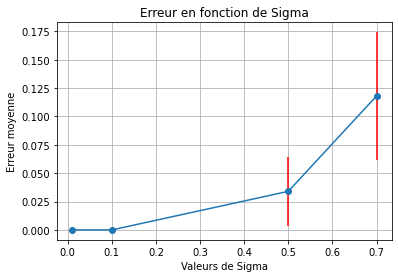

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Paramètres des distributions gaussiennes
mu1, mu2 = np.array([-1, 0]), np.array([1, 0])
y1, y2 = np.ones(125), np.zeros(125)  # Étiquettes

# Paramètres d'entraînement du perceptron
learning_rate = 0.01
epochs = 1000

# Valeurs de sigma à tester
sigma_values = [0.01, 0.1, 0.5, 0.7]
nb_experiences = 30

# Pour stocker les résultats
mean_errors = []
variance_errors = []

# Commencez l'expérience
for sigma in sigma_values:
    test_errors = []  # Liste pour stocker les erreurs de l'ensemble de test pour chaque expérience
    for _ in range(nb_experiences):
        # Générer les points de données
        x1 = np.random.normal(mu1, sigma, (125, 2))
        x2 = np.random.normal(mu2, sigma, (125, 2))

        # Fusionner et mélanger les données
        X = np.vstack((x1, x2))
        y = np.concatenate((y1, y2))
        X, y = shuffle(X, y, random_state=None)

        # Diviser en ensembles d'entraînement et de test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

        # Entraînez le perceptron
        weights, training_errors = perceptron(X_train, y_train, learning_rate, epochs)

        # Calculez l'erreur sur l'ensemble de test
        test_error = calculate_test_error(X_test, y_test, weights)
        test_errors.append(test_error)  # Ajoutez l'erreur de test à la liste

    # Calculez la moyenne et la variance des erreurs de l'ensemble de test
    mean_errors.append(np.mean(test_errors))
    variance_errors.append(np.var(test_errors))

# Tracez les résultats
plt.errorbar(sigma_values, mean_errors, yerr=np.sqrt(variance_errors), fmt='-o')
plt.xlabel('Valeurs de Sigma')
plt.ylabel('Erreur moyenne')
plt.grid(True)
plt.title('Erreur en fonction de Sigma')
plt.show()


- Pour les petites valeurs de sigma (proches de 0), l'erreur moyenne de classification est très faible, ce qui suggère que lorsque les données des deux classes sont très concentrées autour de leurs moyennes respectives (peu de chevauchement), le perceptron est capable de les séparer efficacement avec une faible erreur.
- À mesure que la valeur de sigma augmente, l'erreur moyenne augmente également, ce qui indique que le chevauchement entre les deux classes de données devient plus important avec une plus grande dispersion (écart-type plus élevé), rendant la tâche de classification plus difficile pour le perceptron, qui est un classificateur linéaire.
- Les barres d'erreur, représentées par les lignes verticales rouges, s'élargissent également avec l'augmentation de sigma, en particulier pour la valeur la plus élevée. Cela suggère que non seulement l'erreur moyenne augmente, mais aussi que les résultats deviennent plus variables d'une expérience à l'autre. Cela peut être dû à une plus grande probabilité de générer des ensembles de données où les classes ne sont pas linéairement séparables en raison d'un chevauchement important.

**Conclusion de l’expérience 3** :<br>
le graphique démontre que le perceptron, qui est un
classificateur linéaire, a des performances dégradées lorsque la séparabilité linéaire des
données est compromise par un chevauchement accru des classes. Cela se produit avec
des données plus dispersées, indiquées par des valeurs de sigma plus élevées. La variabilité
accrue dans les résultats pour des valeurs élevées de sigma souligne également
l'importance de la sélection des caractéristiques et de la préparation des données dans la
construction de modèles de classification robustes.